决策树（Decision Tree）是一种非参数的有监督学习方法，它能够从一系列有特征和标签的数据中总结出决策规则，并用树状图的结构来呈现这些规则，以解决分类和回归问题。决策树算法容易理解，适用各种数据，在解决各种问题时都有良好表现，尤其是以树模型为核心的各种集成算法，在各个行业和领域都有广泛的应用。

决策树算法的核心是要解决两个问题：<br/>
1.如何从数据表中找出最佳节点和最佳分枝？<br/>
2.如何让决策树停止生长，防止过拟合？<br/>
几乎所有决策树有关的模型调整方法，都围绕这两个问题展开。<br/>
[决策树原理](https://www.cnblogs.com/bind/p/12102750.html)<br/>

模块sklearn.tree
sklearn中决策树的类都在”tree“这个模块之下。这个模块总共包含五个类：
| 调用                        | 树                                    |
| --------------------------- | ------------------------------------- |
| tree.DecisionTreeClassifier | 分类树                                |
| tree.DecisionTreeRegressor  | 回归树                                |
| tree.export_graphviz        | 将生成的决策树导出为DOT格式，画图专用 |
| tree.ExtraTreeClassifier    | 高随机版本的分类树                    |
| tree.ExtraTreeRegressor     | 高随机版本的回归树                    |

sklearn的基本建模流程<br>
![image-20210807200050239](https://cdn.jsdelivr.net/gh/zEpoch/imageHome/img/image-20210807200050239.png)
<br>
在这个流程下，分类树对应的代码是：
<br>


```python
from sklearn import tree #导入需要的模块
clf = tree.DecisionTreeClassifier()     #实例化
clf = clf.fit(X_train,y_train) #用训练集数据训练模型
result = clf.score(X_test,y_test) #导入测试集，从接口中调用需要的信息
```



In [13]:
# 步骤1 导入需要的算法库和模块
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [14]:
# 步骤2 导入数据
wine = load_wine()
print("wine.data.shape:\n",wine.data.shape)
#如果wine是一张表，应该长这样：
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
print("wine.feature_names:\n",wine.feature_names)
print("wine.feature_names:\n",wine.target_names)

wine.data.shape:
 (178, 13)
wine.feature_names:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
wine.feature_names:
 ['class_0' 'class_1' 'class_2']


In [15]:
# 步骤3 分训练集和测试集
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target,test_size=0.3)
print(Xtrain.shape,Xtest.shape)

(124, 13) (54, 13)


In [16]:
# 步骤4 建立模型
clf = tree.DecisionTreeClassifier(
    criterion="entropy"
)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest, Ytest)
print(score)

0.8703703703703703


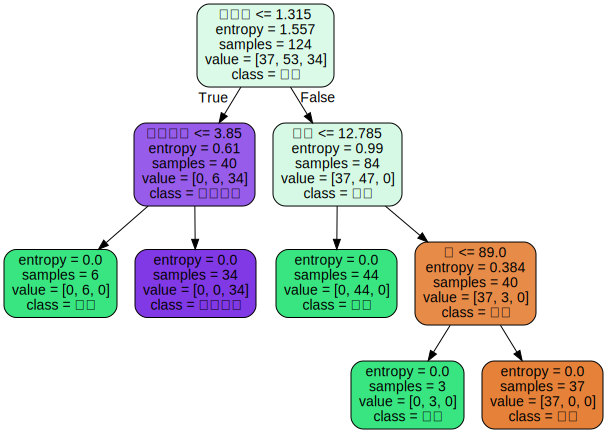

In [17]:
# 步骤5 画出一棵树
feature_names = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz
dot_data = tree.export_graphviz(
    clf
    ,feature_names=feature_names
    ,class_names=["琴酒","雪梨","贝尔摩特"] # 分为三类，三类的名字
    ,filled=True
    ,rounded=True # 圆角
)
graph = graphviz.Source(dot_data)
graph

In [18]:
# 特征的重要性
clf.feature_importances_
[*zip(feature_names,clf.feature_importances_)]

[('酒精', 0.3510920519785853),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.07964302626558875),
 ('总酚', 0.0),
 ('类黄酮', 0.44288431167881986),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.12638061007700604),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.0)]

在只了解一个参数的情况下，建立了一棵完整的决策树。但是回到建立模型的步骤，score会在某个值附近波动，引起步骤5中画出来的每一棵树都不一样。它为什么会不稳定呢？如果使用其他数据集，它还会不稳定吗？<br>
无论决策树模型如何进化，在分枝上的本质都还是追求某个不纯度相关的指标的优化，不纯度是基于节点来计算的，也就是说，决策树在建树时，是靠优化节点来追求一棵优化的树，但最优的节点却不能够保证最优的树。集成算法被用来解决这个问题：<br>
sklearn表示，既然一棵树不能保证最优，那就建更多的不同的树，然后从中取最好的。怎样从一组数据集中建不同的树？在每次分枝时，不从使用全部特征，而是随机选取一部分特征，从中选取不纯度相关指标最优的作为分枝用的节点。这样，每次生成的树也就不同了。

In [19]:
clf = tree.DecisionTreeClassifier(
    criterion="entropy"
    ,random_state=30
)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest) #返回预测的准确度
score

0.8888888888888888

random_state用来设置分枝中的随机模式的参数，默认None，在高维度时随机性会表现更明显，低维度的数据（比如鸢尾花数据集），随机性几乎不会显现。输入任意整数，会一直长出同一棵树，让模型稳定下来。<br>
splitter也是用来控制决策树中的随机选项的，有两种输入值，输入”best"，决策树在分枝时虽然随机，但是还是会优先选择更重要的特征进行分枝（重要性可以通过属性feature_importances_查看），输入“random"，决策树在分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。这也是防止过拟合的一种方式。当你预测到你的模型会过拟合，用这两个参数来帮助你降低树建成之后过拟合的可能性。当然，树一旦建成，我们依然是使用剪枝参数来防止过拟合。

score:
 0.9629629629629629


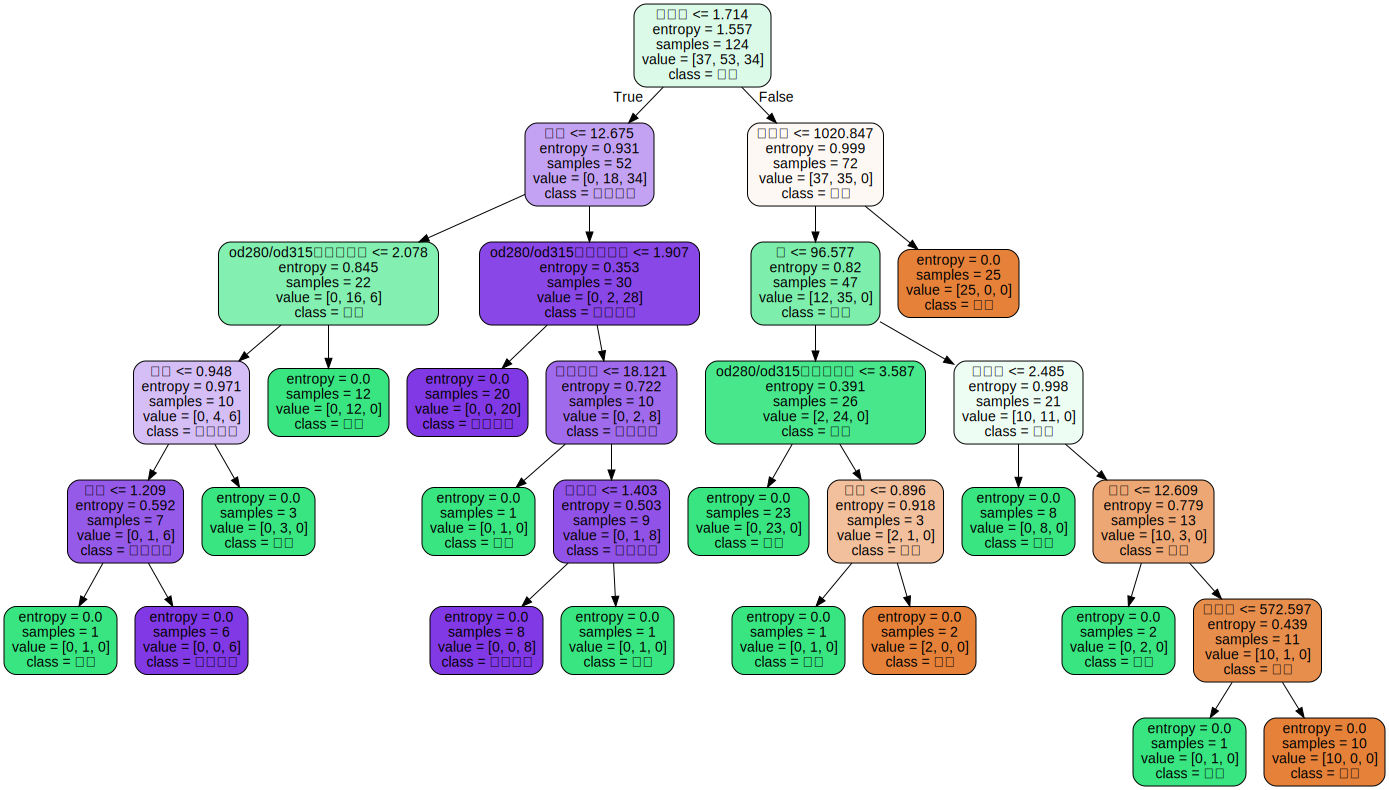

In [20]:
clf = tree.DecisionTreeClassifier(
    criterion="entropy"
    ,random_state=30
    ,splitter="random"
)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
print("score:\n",score)
import graphviz
dot_data = tree.export_graphviz(
    clf
    ,feature_names= feature_names
    ,class_names=["琴酒","雪莉","贝尔摩德"]
    ,filled=True
    ,rounded=True
)  
graph = graphviz.Source(dot_data)
graph

在不加限制的情况下，一棵决策树会生长到衡量不纯度的指标最优，或者没有更多的特征可用为止。这样的决策树往往会过拟合，这就是说，它会在训练集上表现很好，在测试集上却表现糟糕。我们收集的样本数据不可能和整体的状况完全一致，因此当一棵决策树对训练数据有了过于优秀的解释性，它找出的规则必然包含了训练样本中的噪声，并使它对未知数据的拟合程度不足。

In [21]:
# 我们的树对训练集的拟合程度如何？
score_train = clf.score(Xtrain, Ytrain)
score_train

1.0

为了让决策树有更好的泛化性，我们要对决策树进行剪枝。剪枝策略对决策树的影响巨大，正确的剪枝策略是优化

决策树算法的核心。sklearn为我们提供了不同的剪枝策略：

* max_depth

限制树的最大深度，超过设定深度的树枝全部剪掉

这是用得最广泛的剪枝参数，在高维度低样本量时非常有效。决策树多生长一层，对样本量的需求会增加一倍，所以限制树深度能够有效地限制过拟合。在集成算法中也非常实用。实际使用时，建议从=3开始尝试，看看拟合的效果再决定是否增加设定深度。

* min_samples_leaf & min_samples_split

min_samples_leaf限定，一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生，或者，分枝会朝着满足每个子节点都包含min_samples_leaf个样本的方向去发生

一般搭配max_depth使用，在回归树中有神奇的效果，可以让模型变得更加平滑。这个参数的数量设置得太小会引起过拟合，设置得太大就会阻止模型学习数据。一般来说，建议从=5开始使用。如果叶节点中含有的样本量变化很大，建议输入浮点数作为样本量的百分比来使用。同时，这个参数可以保证每个叶子的最小尺寸，可以在回归问题中避免低方差，过拟合的叶子节点出现。对于类别不多的分类问题，=1通常就是最佳选择。

min_samples_split限定，一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发生。


0.9516129032258065
0.9259259259259259


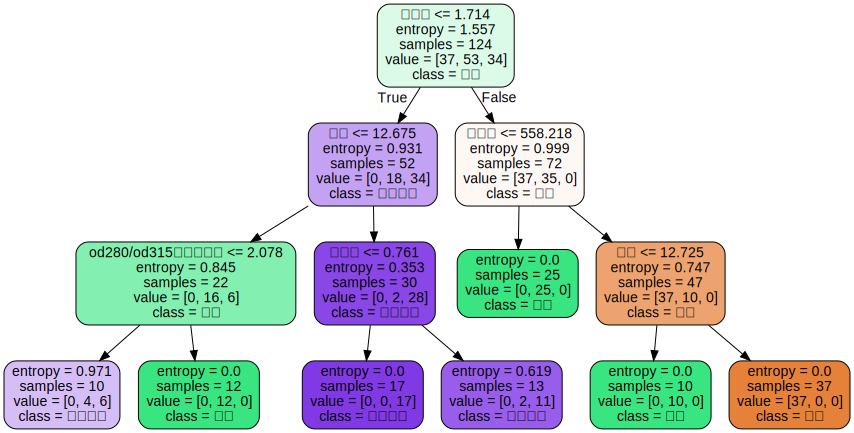

In [22]:
clf = tree.DecisionTreeClassifier(
    criterion="entropy"
    ,random_state=30
    ,splitter="random"
    ,max_depth=3
    ,min_samples_leaf=10
    ,min_samples_split=10
                                 )
clf = clf.fit(Xtrain, Ytrain)
dot_data = tree.export_graphviz(
    clf
    ,feature_names= feature_names
    ,class_names=["琴酒","雪莉","贝尔摩德"]
    ,filled=True
    ,rounded=True
                               )  
graph = graphviz.Source(dot_data)
print(clf.score(Xtrain,Ytrain))
print(clf.score(Xtest,Ytest))
graph


* max_features & min_impurity_decrease

一般 max_depth 使用，用作树的”精修“ 

max_features 限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃。和 max_depth 异曲同工，<br>
max_features 是用来限制高维度数据的过拟合的剪枝参数，但其方法比较暴力，是直接限制可以使用的特征数量而强行使决策树停下的参数，在不知道决策树中的各个特征的重要性的情况下，强行设定这个参数可能会导致模型学习不足。如果希望通过降维的方式防止过拟合，建议使用 PCA，ICA 或者特征选择模块中的降维算法。

min_impurity_decrease 限制信息增益的大小，信息增益小于设定数值的分枝不会发生。这是在0.19版本中更新的功能，在0.19版本之前时使用 min_impurity_split。

* 确认最优的剪枝参数

那具体怎么来确定每个参数填写什么值呢？这时候，我们就要使用确定超参数的曲线来进行判断了，继续使用我们已经训练好的决策树模型 clf。超参数的学习曲线，是一条以超参数的取值为横坐标，模型的度量指标为纵坐标的曲线，它是用来衡量不同超参数取值下模型的表现的线。在我们建好的决策树里，我们的模型度量指标就是 score。


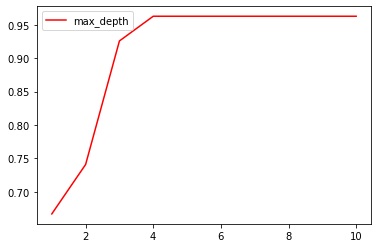

In [23]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                     ,criterion="entropy"
                                     ,random_state=30
                                     ,splitter="random"
                                     )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()


思考：
1. 剪枝参数一定能够提升模型在测试集上的表现吗？ - 调参没有绝对的答案，一切都是看数据本身。
2. 这么多参数，一个个画学习曲线？ - 在泰坦尼克号的案例中，我们会解答这个问题。

无论如何，剪枝参数的默认值会让树无尽地生长，这些树在某些数据集上可能非常巨大，对内存的消耗也非常巨大。所以如果你手中的数据集非常巨大，你已经预测到无论如何你都是要剪枝的，那提前设定这些参数来控制树的复杂性和大小会比较好。


* class_weight & min_weight_fraction_leaf

完成样本标签平衡的参数。样本不平衡是指在一组数据集中，标签的一类天生占有很大的比例。比如说，在银行要判断“一个办了信用卡的人是否会违约”，就是是vs否（1%：99%）的比例。这种分类状况下，即便模型什么也不做，全把结果预测成“否”，正确率也能有99%。因此我们要使用class_weight参数对样本标签进行一定的均衡，给少量的标签更多的权重，让模型更偏向少数类，向捕获少数类的方向建模。该参数默认None，此模式表示自动给与数据集中的所有标签相同的权重。

有了权重之后，样本量就不再是单纯地记录数目，而是受输入的权重影响了，因此这时候剪枝，就需要搭配 min_weight_fraction_leaf 这个基于权重的剪枝参数来使用。另请注意，基于权重的剪枝参数（例如 min_weight_fraction_leaf）将比不知道样本权重的标准（比如 min_samples_leaf）更少偏向主导类。如果样本是加权的，则使用基于权重的预修剪标准来更容易优化树结构，这确保叶节点至少包含样本权重的总和的一小部分.

### 重要属性和接口

属性是在模型训练之后，能够调用查看的模型的各种性质。对决策树来说，最重要的是 feature_importances_，能够查看各个特征对模型的重要性。

sklearn 中许多算法的接口都是相似的，比如说我们之前已经用到的 fit 和 score，几乎对每个算法都可以使用。除了这两个接口之外，决策树最常用的接口还有 apply 和 predict。apply 中输入测试集返回每个测试样本所在的叶子节点的索引，predict 输入测试集返回每个测试样本的标签。

在这里不得不提的是，所有接口中要求输入 X_train 和 X_test 的部分，输入的特征矩阵必须至少是一个二维矩阵。sklearn 不接受任何一维矩阵作为特征矩阵被输入。如果你的数据的确只有一个特征，那必须用reshape(-1,1)来给矩阵增维；如果你的数据只有一个特征和一个样本，使用reshape(1,-1)来给你的数据增维。至此，我们已经学完了分类树DecisionTreeClassifier和用决策树绘图（export_graphviz）的所有基础。


In [24]:
#apply返回每个测试样本所在的叶子节点的索引
print(clf.apply(Xtest))
#predict返回每个测试样本的分类/回归结果
print(clf.predict(Xtest))

NameError: name 'prince' is not defined

我们讲解了决策树的基本流程，分类树的八个参数，一个属性，四个接口，以及绘图所用的代码。

八个参数：Criterion，两个随机性相关的参数（random_state，splitter），五个剪枝参数（max_depth,min_samples_split，min_samples_leaf，max_feature，min_impurity_decrease）

一个属性：feature_importances_

四个接口：fit，score，apply，predict

有了这些知识，基本上分类树的使用大家都能够掌握了，接下来再到实例中去磨练就好。
